In [28]:
# Imports
%reload_ext autoreload
%autoreload 2 
import os
from embed_time.splitter_static import DatasetSplitter
from embed_time.dataset_static import ZarrCellDataset, ZarrCellDataset_specific
from embed_time.dataloader_static import collate_wrapper
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import v2
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cell_data(dataset_image):
    """
    Plot all data for a selected image across all channels from a ZarrCellDataset.
    Include range measurements for pixel intensities.
    
    Args:
    dataset_image (dict): The image data from the dataset
    """
    
    sample = dataset_image
    original_images = sample['original_image']
    cell_masks = sample['cell_mask']
    nuclei_masks = sample['nuclei_mask']
    cell_images = sample['cell_image']
    nuclei_images = sample['nuclei_image']
    
    # If cell and nuclei masks are 2 dimensional, add a channel dimension
    if cell_masks.ndim == 2:
        cell_masks = cell_masks[None]
    if nuclei_masks.ndim == 2:
        nuclei_masks = nuclei_masks[None]

    num_channels = original_images.shape[0]
    
    # Create a figure with 5 rows and num_channels columns
    fig, axes = plt.subplots(5, num_channels, figsize=(4*num_channels, 20))
    
    # If there's only one channel, we need to reshape axes to be 2D
    if num_channels == 1:
        axes = axes.reshape(-1, 1)
    
    titles = ['Original', 'Cell Mask', 'Nuclei Mask', 'Cell Image', 'Nuclei Image']
    
    for channel in range(num_channels):
        # Original image
        im = axes[0, channel].imshow(original_images[channel], cmap='gray')
        axes[0, channel].set_title(f'{titles[0]} - Channel {channel}')
        plt.colorbar(im, ax=axes[0, channel])
        
        # Cell mask (same for all channels)
        im = axes[1, channel].imshow(cell_masks[0], cmap='gray')
        axes[1, channel].set_title(f'{titles[1]} - Channel {channel}')
        plt.colorbar(im, ax=axes[1, channel])
        
        # Nuclei mask (same for all channels)
        im = axes[2, channel].imshow(nuclei_masks[0], cmap='gray')
        axes[2, channel].set_title(f'{titles[2]} - Channel {channel}')
        plt.colorbar(im, ax=axes[2, channel])
        
        # Cell image
        im = axes[3, channel].imshow(cell_images[channel], cmap='gray')
        axes[3, channel].set_title(f'{titles[3]} - Channel {channel}')
        plt.colorbar(im, ax=axes[3, channel])
        
        # Nuclei image
        im = axes[4, channel].imshow(nuclei_images[channel], cmap='gray')
        axes[4, channel].set_title(f'{titles[4]} - Channel {channel}')
        plt.colorbar(im, ax=axes[4, channel])
    
    # Remove axis ticks
    for ax in axes.flatten():
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def print_cell_data_shapes(dataset_image):
    """
    Print the shapes of all data for a selected image across all channels from a ZarrCellDataset.
    
    Args:
    dataset (ZarrCellDataset): The dataset containing the images
    image_index (int): Index of the image to examine (default: 0)
    """
    
    sample = dataset_image
    
    print(f"Original Image: {sample['original_image'].shape}")
    print(f"Cell Mask: {sample['cell_mask'].shape}")
    print(f"Nuclei Mask: {sample['nuclei_mask'].shape}")
    print(f"Cell Image: {sample['cell_image'].shape}")
    print(f"Nuclei Image: {sample['nuclei_image'].shape}")

In [30]:
# Usage example:
parent_dir = '/mnt/efs/dlmbl/S-md/'
output_file = '/home/S-md/embed_time/notebooks/splits/example_split.csv'
train_ratio = 0.7
val_ratio = 0.15
num_workers = -1

# Create the dataset split CSV file
DatasetSplitter(parent_dir, output_file, train_ratio, val_ratio, num_workers).generate_split()

Processing 2 genes...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Combining results...
Creating DataFrame and saving CSV...
Dataset split CSV saved to /home/S-md/embed_time/notebooks/splits/example_split.csv


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s finished


The dataset contains 671 images.
(671, 4) [[ 701.62477202  714.69102253  728.28146452 ...  656.44591827
   672.28207451  681.3916538 ]
 [ 184.90320719  180.18302888  173.77818647 ...  518.12222592
   522.32177662  526.49226015]
 [ 974.42483791  979.67293193  992.91684383 ...  197.72108913
   200.20184379  196.56535498]
 ...
 [ 601.0774719   602.1026305   602.14509316 ... 1067.81920639
  1080.71882444 1092.77114613]
 [ 601.17650071  601.40215597  601.74107922 ... 1821.59500524
  1910.28658318 1980.73638052]
 [1108.08031408 1110.29874587 1121.1415505  ... 1053.51484652
  1063.55464351 1072.99256513]]


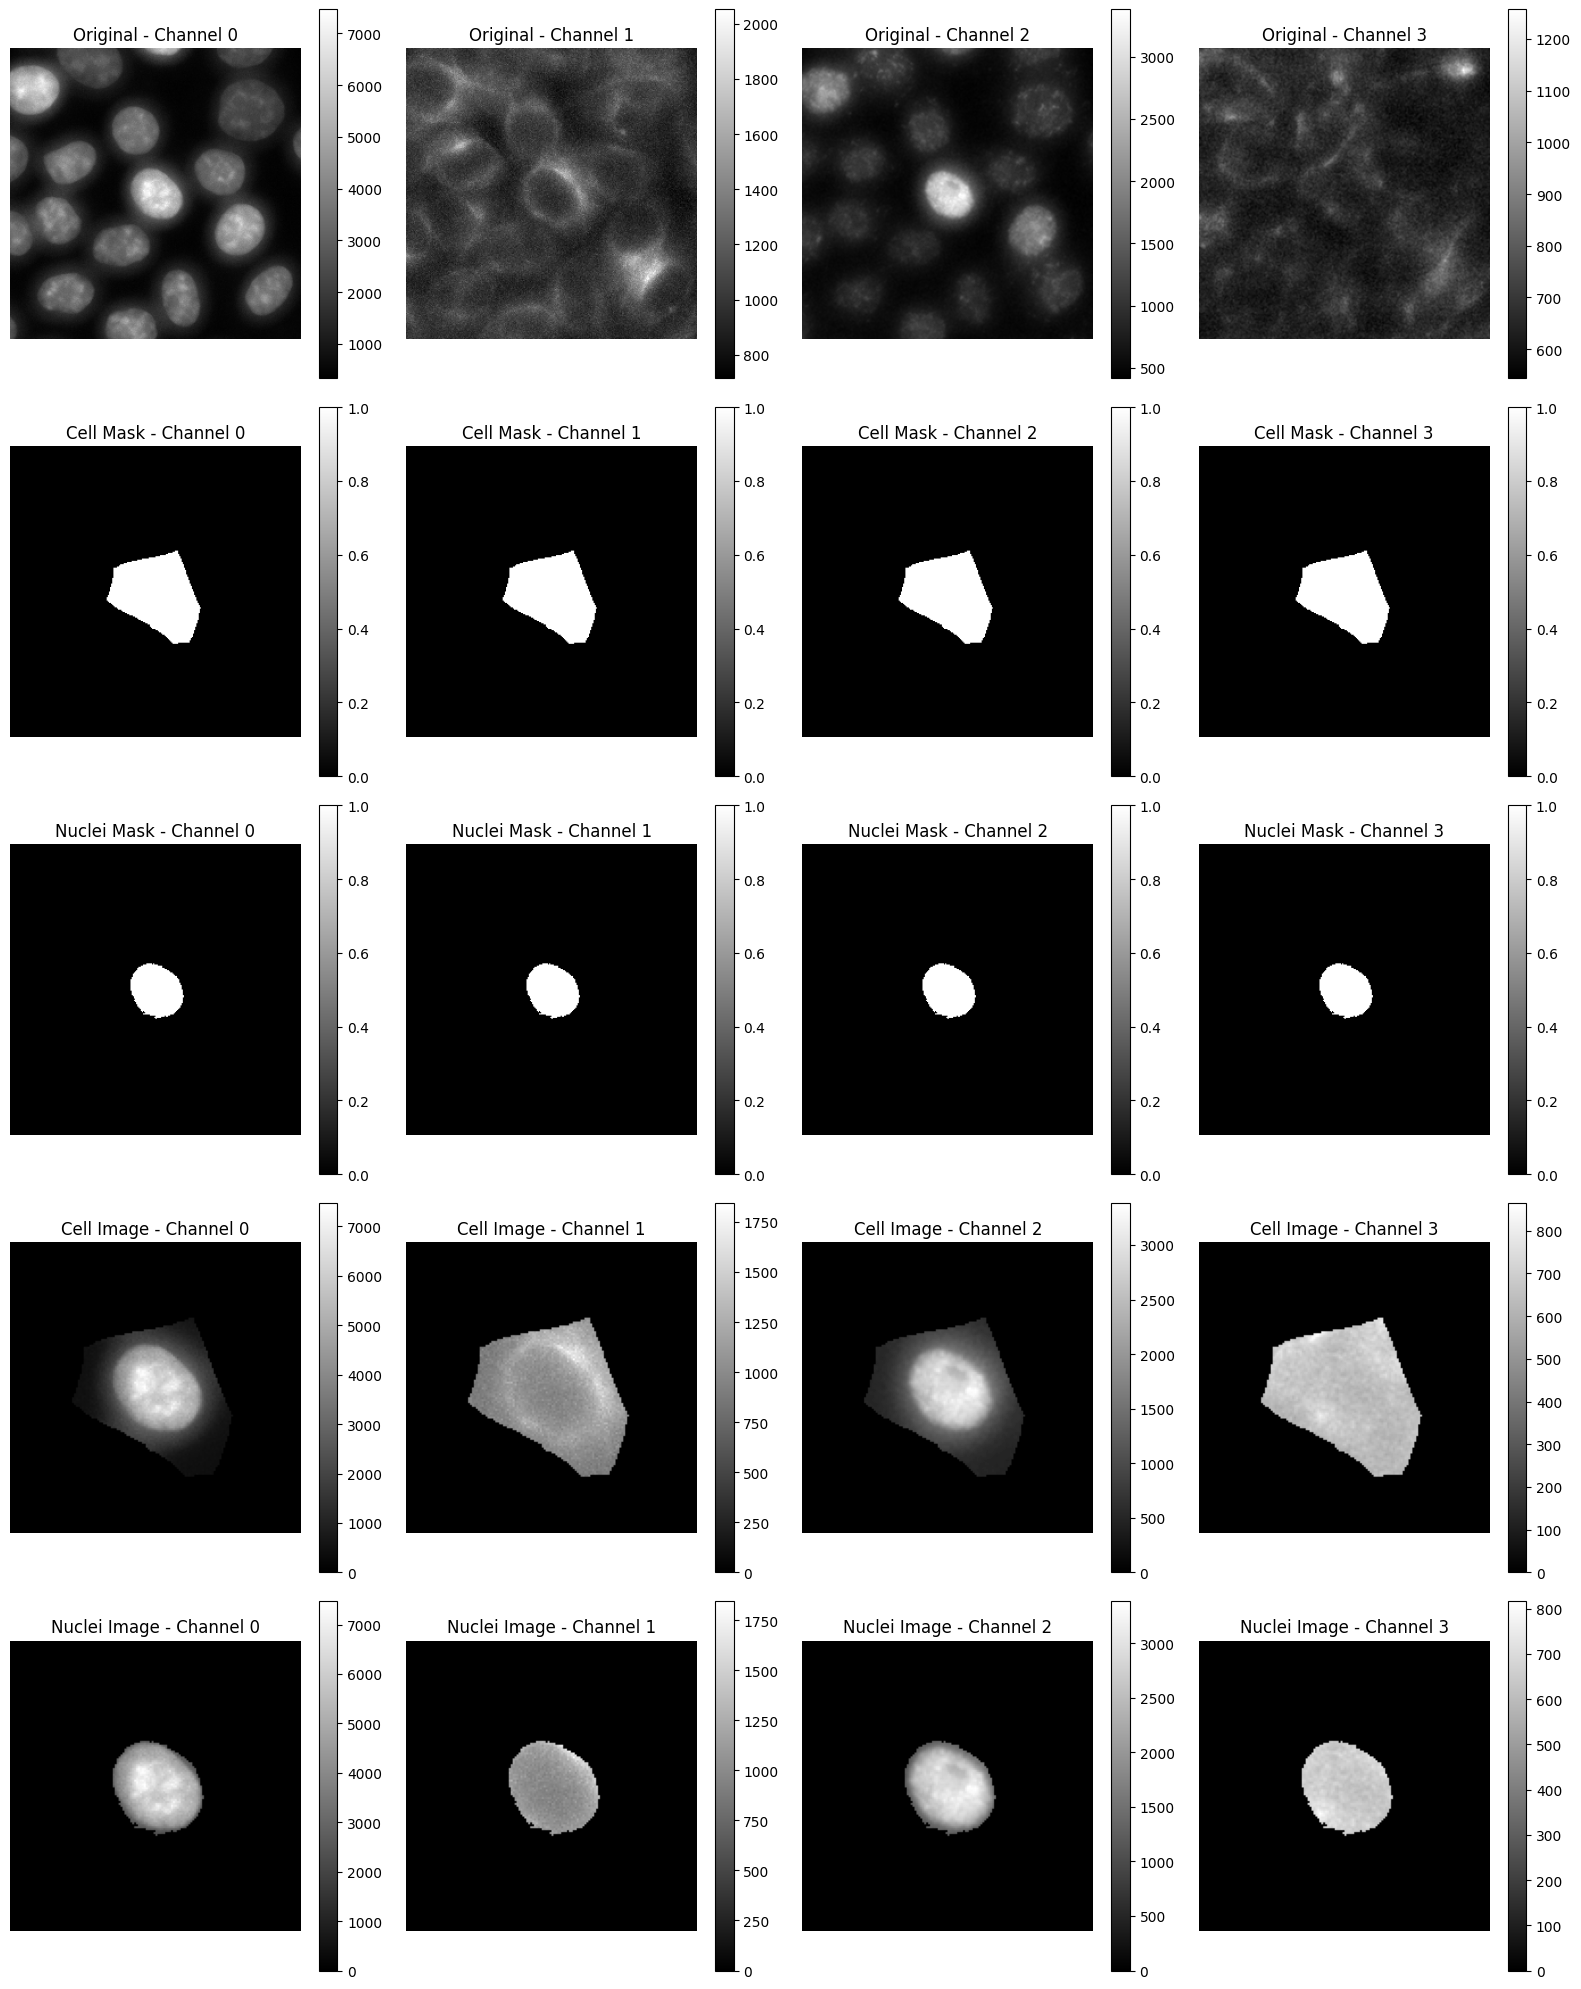

(671, 4) [[ 701.62477202  714.69102253  728.28146452 ...  656.44591827
   672.28207451  681.3916538 ]
 [ 184.90320719  180.18302888  173.77818647 ...  518.12222592
   522.32177662  526.49226015]
 [ 974.42483791  979.67293193  992.91684383 ...  197.72108913
   200.20184379  196.56535498]
 ...
 [ 601.0774719   602.1026305   602.14509316 ... 1067.81920639
  1080.71882444 1092.77114613]
 [ 601.17650071  601.40215597  601.74107922 ... 1821.59500524
  1910.28658318 1980.73638052]
 [1108.08031408 1110.29874587 1121.1415505  ... 1053.51484652
  1063.55464351 1072.99256513]]
Original Image: (4, 256, 256)
Cell Mask: (1, 256, 256)
Nuclei Mask: (1, 256, 256)
Cell Image: torch.Size([4, 150, 150])
Nuclei Image: torch.Size([4, 150, 150])


In [41]:
# Usage example:
parent_dir = '/mnt/efs/dlmbl/S-md/'
gene_name = 'AAAS'
barcode_name = 'ATATGAGCACAATAACGAGC'
channels = [0, 1, 2, 3]
cell_cycle_stages = 'interphase'
mask = "masks"
normalizations = v2.Compose([
    v2.ToTensor(),  
    v2.CenterCrop(150),
])
interpolations = None

# Create the dataset
dataset = ZarrCellDataset_specific(parent_dir, gene_name, barcode_name, channels, cell_cycle_stages, mask, normalizations, interpolations)

# Print the number of images and shapes of the data
print(f"The dataset contains {len(dataset)} images.")

# Plot the first image (index 0)
plot_cell_data(dataset.__getitem__(42))

# Print the shapes of the data for the first image
print_cell_data_shapes(dataset.__getitem__(42))

In [32]:
# Create a DataLoader for the dataset
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate over the DataLoader
for i, batch in enumerate(dataloader):
    print(f"Batch {i}:")
    print(batch.keys())
    print(f"Gene:" , batch['gene'])
    print(f"Barcode:" , batch['barcode'])
    print(f"Stage:" , batch['stage'])
    print(f"Cell Image: {batch['cell_image'].shape}")
    print(f"Nuclei Image: {batch['nuclei_image'].shape}")
    break

Batch 0:
dict_keys(['gene', 'barcode', 'stage', 'original_image', 'cell_mask', 'nuclei_mask', 'cell_image', 'nuclei_image'])
Gene: ['AAAS', 'AAAS']
Barcode: ['ATATGAGCACAATAACGAGC', 'ATATGAGCACAATAACGAGC']
Stage: ['interphase', 'interphase']
Cell Image: torch.Size([2, 4, 150, 150])
Nuclei Image: torch.Size([2, 4, 150, 150])


The dataset contains 13605 images.
(4, 256, 256)
[1036.26118469 2069.94229126  601.4785614   602.28707886] [1420.69017952  700.16207066  487.17064545  314.26347738]


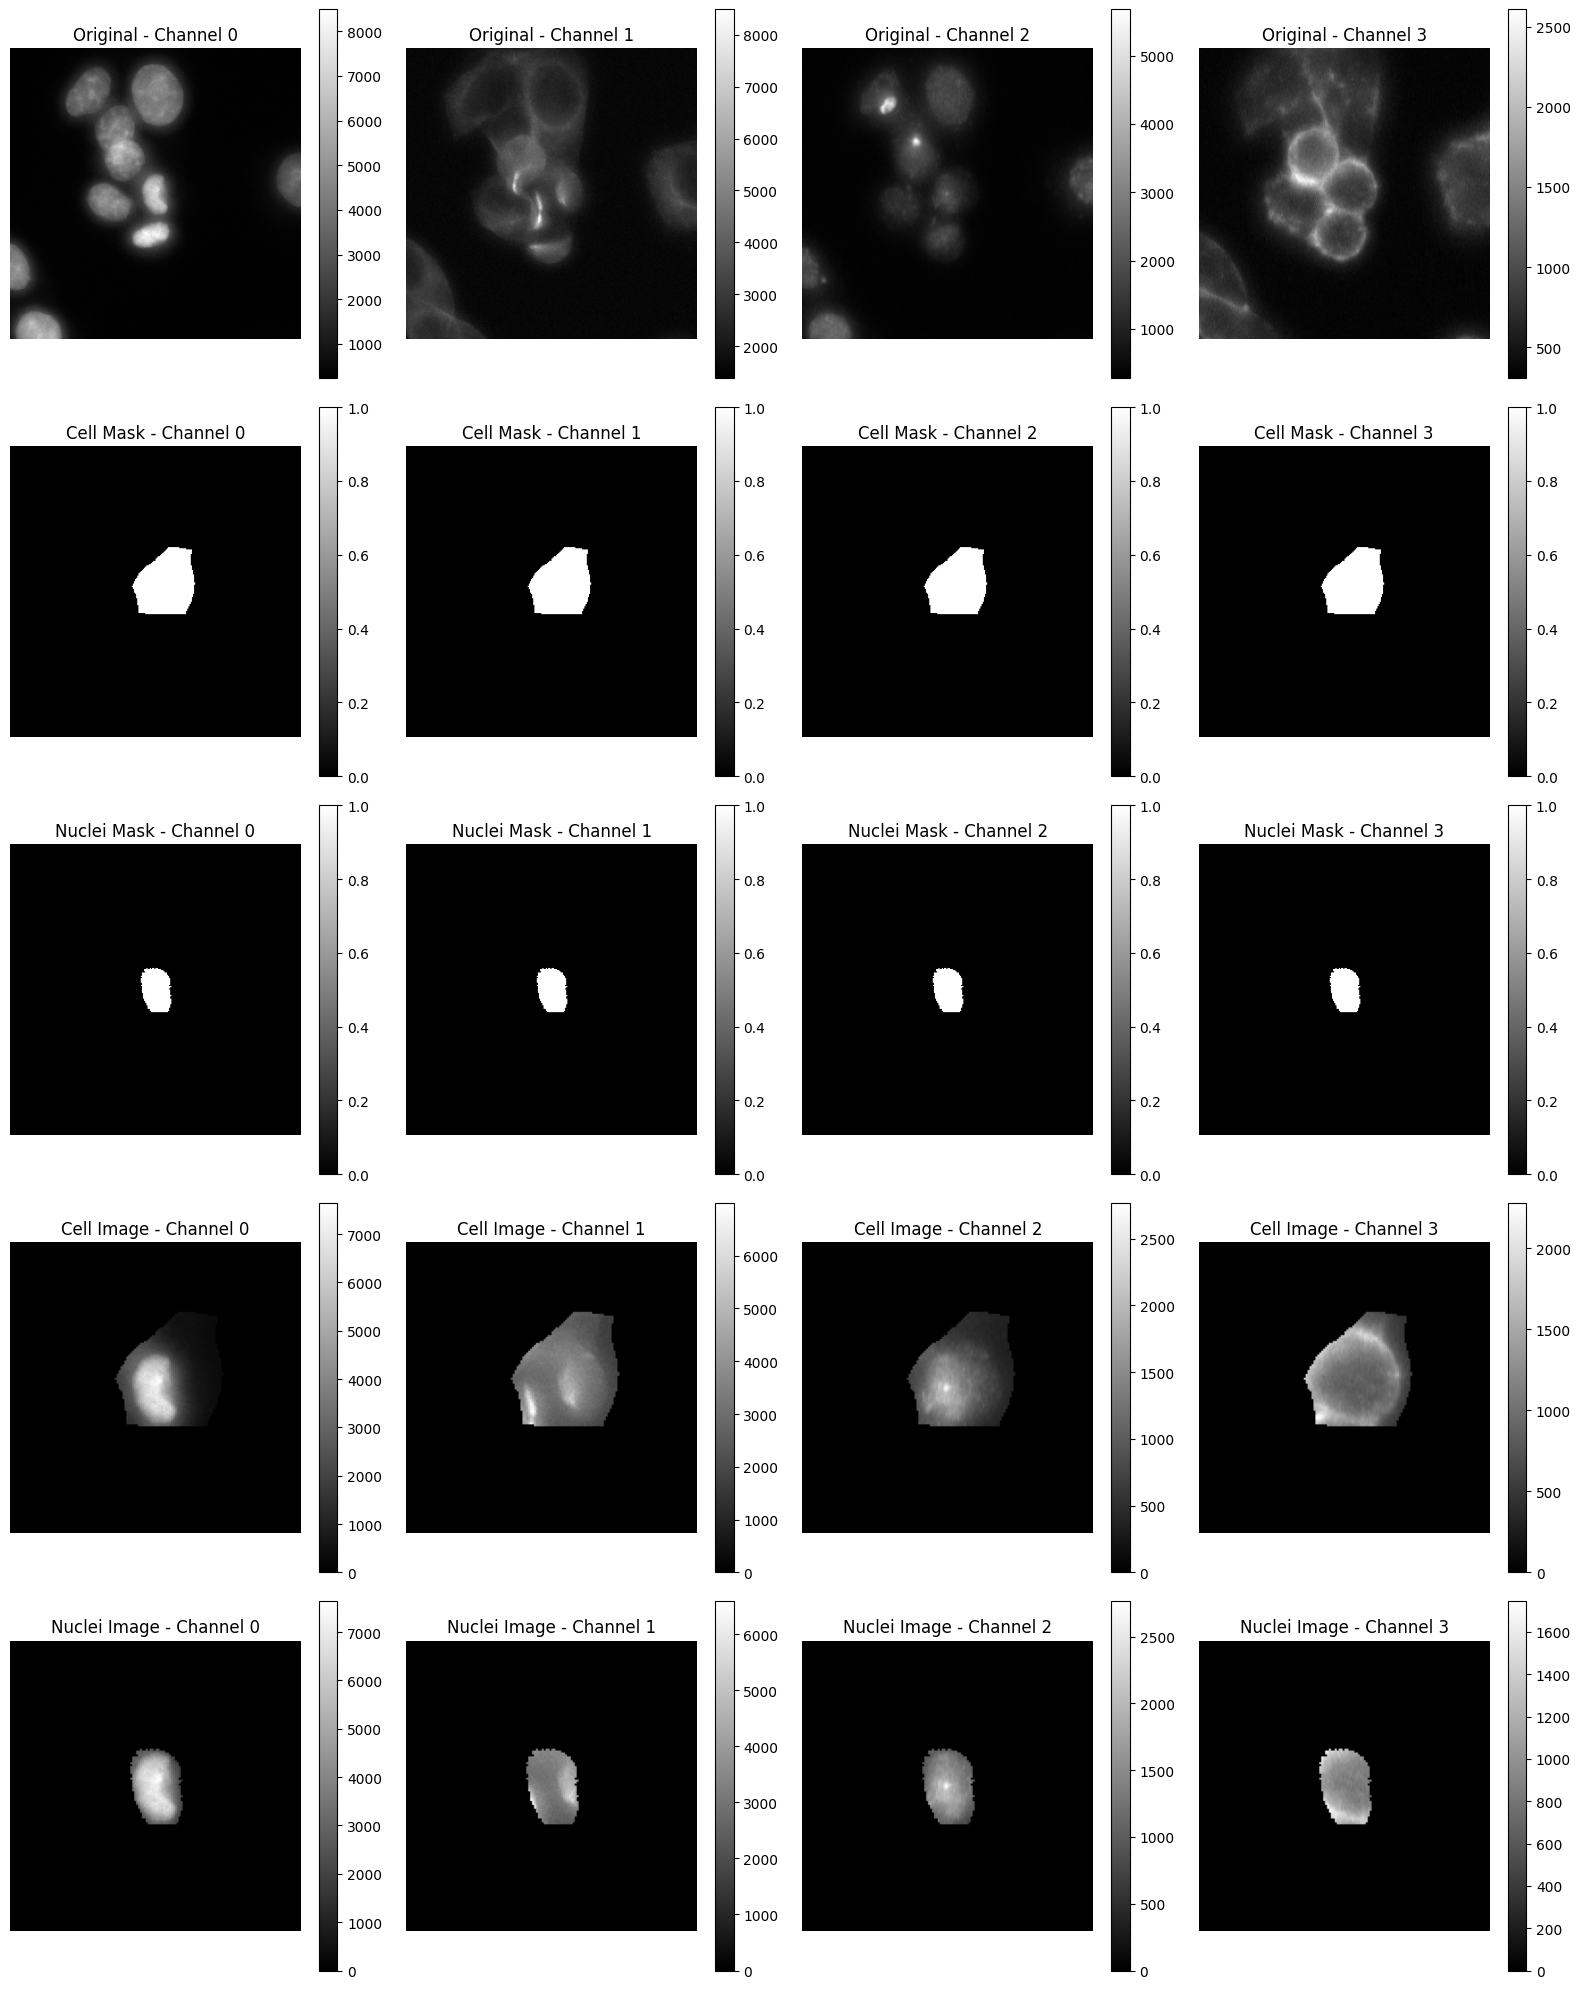

(4, 256, 256)
[1036.26118469 2069.94229126  601.4785614   602.28707886] [1420.69017952  700.16207066  487.17064545  314.26347738]
Original Image: (4, 256, 256)
Cell Mask: (256, 256)
Nuclei Mask: (256, 256)
Cell Image: torch.Size([4, 150, 150])
Nuclei Image: torch.Size([4, 150, 150])


In [42]:
# Usage example:
parent_dir = '/mnt/efs/dlmbl/S-md/'
csv_file = '/home/S-md/embed_time/notebooks/splits/example_split.csv'
split = 'train'
channels = [0, 1, 2, 3]
cell_cycle_stages = 'interphase'
mask = "masks"
normalizations = v2.Compose([
    v2.ToTensor(),  
    v2.CenterCrop(150),
])
interpolations = None

# Create the dataset
dataset = ZarrCellDataset(parent_dir, csv_file, split, channels, mask, normalizations, interpolations)

# Print the number of images and shapes of the data
print(f"The dataset contains {len(dataset)} images.")

# Plot the first image (index 0)
plot_cell_data(dataset.__getitem__(42))

# Print the shapes of the data for the first image
print_cell_data_shapes(dataset.__getitem__(42))

In [34]:
# Define the metadata keys
metadata_keys = ['gene', 'barcode', 'stage']
images_keys = ['cell_image', 'nuclei_image']

# Create a DataLoader for the dataset
dataloader = DataLoader(
    dataset, 
    batch_size=2, 
    shuffle=True, 
    collate_fn=collate_wrapper(metadata_keys, images_keys)
)

In [35]:
# Iterate over the DataLoader
for i, batch in enumerate(dataloader):
    print(f"Batch {i}:")
    print(f"Gene:" , batch['gene'])
    print(f"Barcode:" , batch['barcode'])
    print(f"Stage:" , batch['stage'])
    print(f"Cell Image: {batch['cell_image'].shape}")
    print(f"Nuclei Image: {batch['nuclei_image'].shape}")
    break

# If you want to move the batch to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch = batch.to(device)

Batch 0:
Gene: ('AAGAB', 'AAGAB')
Barcode: ('AGCAGACATCAATCTATGTG', 'CAAGAATGGTGCATCAAACA')
Stage: ('interphase', 'interphase')
Cell Image: torch.Size([2, 4, 150, 150])
Nuclei Image: torch.Size([2, 4, 150, 150])


/home/S-md/embed_time/src/embed_time/dataloader_static.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.images[key].append(torch.tensor(item[key], dtype=torch.float32))
